In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as sp
import matplotlib.pyplot as plt
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/base_paper_dataset/IMDB Dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
#convert to string
df['review'] = df['review'].astype(str) 
df.dtypes

review       object
sentiment    object
dtype: object

In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df = df.drop_duplicates(subset=['review'])
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
from textblob import Word, TextBlob

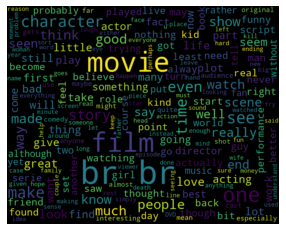

In [ ]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in df['review']])
wordCloud = WordCloud(width =1000, height =800, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Get the percentage of positive comment
pcomment = df[df.sentiment == 'positive']
pcomment = pcomment['review']
round((pcomment.shape[0]/df.shape[0]*100), 1)

50.2

In [ ]:
# Get the percentage of negative comment
ncomment = df[df.sentiment == 'negative']
ncomment = ncomment['review']
round((ncomment.shape[0]/df.shape[0]*100), 1)

49.8

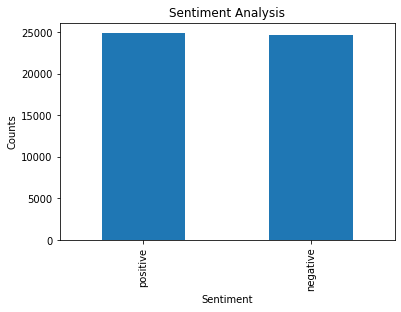

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Displaying the Sentiment Coutns
df['sentiment'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['sentiment'].value_counts().plot(kind='bar')
plt.show()

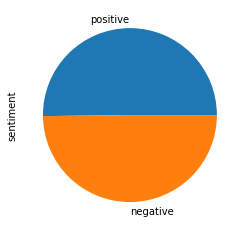

In [ ]:
df['sentiment'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
def data_summary(df):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(df.review) for word in t.strip().split()]
    class_label= [k for k,v in df.sentiment.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(df[df.sentiment==label].review) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(df[df.sentiment==label].review)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(df[df.sentiment==label].review))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(df)


Class Name :  positive
Number of Documents:24884
Number of Words:5800227
Number of Unique Words:251217
Most Frequent Words:

the	325111
and	170782
a	160440
of	150236
to	129177
is	108654
in	95343
i	66516
it	64530
this	63902

Class Name :  negative
Number of Documents:24698
Number of Words:5670577
Number of Unique Words:244858
Most Frequent Words:

the	308870
a	153968
and	140596
of	134372
to	133422
is	94834
in	83144
i	73877
this	73496
that	65536
Total Number of Unique Words:390931


                          **Preprocessing**

Lower casing

In [ ]:
df['review']=df['review'].apply(lambda x: x.lower())

Punctuation Remove

In [ ]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['review']= df['review'].apply(lambda x:remove_punctuation(x))
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


Removing URLs

In [ ]:
df['review'] = df['review'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
df

<ipython-input-21-aebcc51e78f3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


Stopwords

It allows us to get rid of commonly used words.

In [ ]:
def remove_stop(x):
  return ",".join([word for word in str(x).split() if word not in stop_words]) #stopwords removal)
df['review'] = df['review'].apply(lambda x: remove_stop(x))
df

,review,sentiment
0,"one,reviewers,mentioned,watching,1,oz,episode,...",positive
1,"wonderful,little,production,br,br,filming,tech...",positive
2,"thought,wonderful,way,spend,time,hot,summer,we...",positive
3,"basically,theres,family,little,boy,jake,thinks...",negative
4,"petter,matteis,love,time,money,visually,stunni...",positive
...,...,...
49995,"thought,movie,right,good,job,wasnt,creative,or...",positive
49996,"bad,plot,bad,dialogue,bad,acting,idiotic,direc...",negative
49997,"catholic,taught,parochial,elementary,schools,n...",negative
49998,"im,going,disagree,previous,comment,side,maltin...",negative


Remove emoji’s

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['review'] = df['review'].apply(lambda x: remove_emoji(x))
df

,review,sentiment
0,"one,reviewers,mentioned,watching,1,oz,episode,...",positive
1,"wonderful,little,production,br,br,filming,tech...",positive
2,"thought,wonderful,way,spend,time,hot,summer,we...",positive
3,"basically,theres,family,little,boy,jake,thinks...",negative
4,"petter,matteis,love,time,money,visually,stunni...",positive
...,...,...
49995,"thought,movie,right,good,job,wasnt,creative,or...",positive
49996,"bad,plot,bad,dialogue,bad,acting,idiotic,direc...",negative
49997,"catholic,taught,parochial,elementary,schools,n...",negative
49998,"im,going,disagree,previous,comment,side,maltin...",negative


Tokenization

break sentences into parts

In [ ]:
# df['Customer_reviewText'] = df['Customer_reviewText'].astype(str)

In [ ]:
df["review"]=df["review"].apply(lambda x: TextBlob(x).words)
df

,review,sentiment
0,"[one, reviewers, mentioned, watching,1, oz, ep...",positive
1,"[wonderful, little, production, br, br, filmin...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, theres, family, little, boy, jake,...",negative
4,"[petter, matteis, love, time, money, visually,...",positive
...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[catholic, taught, parochial, elementary, scho...",negative
49998,"[im, going, disagree, previous, comment, side,...",negative


Stemming

In [ ]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

In [ ]:
df['review'] = df['review'].apply(lambda x: [porter.stem(y) for y in x])
df

,review,sentiment
0,"[one, review, mention, watching,1, oz, episod,...",positive
1,"[wonder, littl, product, br, br, film, techniq...",positive
2,"[thought, wonder, way, spend, time, hot, summe...",positive
3,"[basic, there, famili, littl, boy, jake, think...",negative
4,"[petter, mattei, love, time, money, visual, st...",positive
...,...,...
49995,"[thought, movi, right, good, job, wasnt, creat...",positive
49996,"[bad, plot, bad, dialogu, bad, act, idiot, dir...",negative
49997,"[cathol, taught, parochi, elementari, school, ...",negative
49998,"[im, go, disagre, previou, comment, side, malt...",negative


Lemmatization 

is the process of separating words by root

In [ ]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
df['review'] = df['review'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x])
df

,review,sentiment
0,"[one, review, mention, watching,1, oz, episod,...",positive
1,"[wonder, littl, product, br, br, film, techniq...",positive
2,"[thought, wonder, way, spend, time, hot, summe...",positive
3,"[basic, there, famili, littl, boy, jake, think...",negative
4,"[petter, mattei, love, time, money, visual, st...",positive
...,...,...
49995,"[thought, movi, right, good, job, wasnt, creat...",positive
49996,"[bad, plot, bad, dialogu, bad, act, idiot, dir...",negative
49997,"[cathol, taught, parochi, elementari, school, ...",negative
49998,"[im, go, disagre, previou, comment, side, malt...",negative


In [ ]:
# distribution of the three classes
df['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['sentiment'] = LabelEncoder().fit_transform(df['sentiment'])
df['sentiment']

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 49582, dtype: int64

In [ ]:
df['review'] = df['review'].astype(str)
df['review']

0        ['one', 'review', 'mention', 'watching,1', 'oz...
1        ['wonder', 'littl', 'product', 'br', 'br', 'fi...
2        ['thought', 'wonder', 'way', 'spend', 'time', ...
3        ['basic', 'there', 'famili', 'littl', 'boy', '...
4        ['petter', 'mattei', 'love', 'time', 'money', ...
                               ...                        
49995    ['thought', 'movi', 'right', 'good', 'job', 'w...
49996    ['bad', 'plot', 'bad', 'dialogu', 'bad', 'act'...
49997    ['cathol', 'taught', 'parochi', 'elementari', ...
49998    ['im', 'go', 'disagre', 'previou', 'comment', ...
49999    ['one', 'expect', 'star', 'trek', 'movi', 'hig...
Name: review, Length: 49582, dtype: object

In [ ]:
x = df.review.values
y= df.sentiment.values


In [ ]:
x.shape,y.shape

((49582,), (49582,))

Tokenizer

In [ ]:
MAX_NB_WORDS = 31605

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(df.review)
sequences = tokenizer.texts_to_sequences(df.review)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/text.py:234: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Found 153173 unique tokens.


In [ ]:
sequences[0]

[4,
 235,
 360,
 4906,
 512,
 2902,
 204,
 409,
 1636,
 121,
 559,
 116,
 1931,
 1,
 33,
 35,
 2844,
 2902,
 1096,
 11727,
 17,
 537,
 99,
 121,
 300,
 26,
 1368,
 20,
 5115,
 411,
 8721,
 20,
 588,
 1734,
 1077,
 659,
 332,
 537,
 3020,
 249,
 64,
 17511,
 1,
 172,
 2902,
 6333,
 309,
 11728,
 5651,
 1843,
 536,
 1098,
 1294,
 18114,
 451,
 3448,
 1968,
 789,
 1960,
 1828,
 884,
 238,
 18837,
 13271,
 269,
 3854,
 3217,
 451,
 289,
 3532,
 9862,
 6070,
 1070,
 931,
 2188,
 13907,
 16409,
 250,
 2068,
 6112,
 421,
 6921,
 6643,
 48,
 159,
 4465,
 1,
 15,
 39,
 207,
 809,
 20,
 606,
 105,
 203,
 20,
 498,
 1502,
 675,
 104,
 293,
 1056,
 2219,
 189,
 675,
 635,
 675,
 75,
 760,
 118,
 33,
 204,
 56,
 138,
 2844,
 1390,
 1777,
 352,
 39,
 1447,
 12,
 374,
 945,
 2902,
 107,
 8236,
 269,
 486,
 1213,
 537,
 537,
 5441,
 3021,
 1764,
 10854,
 2669,
 20528,
 4488,
 10854,
 106,
 469,
 11,
 181,
 18,
 1031,
 704,
 671,
 4488,
 100,
 789,
 4194,
 606,
 294,
 645,
 1003,
 789,
 358,
 12,
 2902

In [ ]:
type(tokenizer.word_index), len(tokenizer.word_index)

(dict, 153173)

In [ ]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())

In [ ]:
" ".join([index_to_word[i] for i in sequences[0]])

"'one' 'review' 'mention' 'watching 1' 'oz' 'episod' 'youll' 'hook' 'right' 'exactli' 'happen' 'mebr' 'br' 'first' 'thing' 'struck' 'oz' 'brutal' 'unflinch' 'scene' 'violenc' 'set' 'right' 'word' 'go' 'trust' 'show' 'faint' 'heart' 'timid' 'show' 'pull' 'punch' 'regard' 'drug' 'sex' 'violenc' 'hardcor' 'classic' 'use' 'wordbr' 'br' 'call' 'oz' 'nicknam' 'given' 'oswald' 'maximum' 'secur' 'state' 'focus' 'mainli' 'emerald' 'citi' 'experiment' 'section' 'prison' 'cell' 'glass' 'front' 'face' 'inward' 'privaci' 'high' 'agenda' 'em' 'citi' 'home' 'muslim' 'gangsta' 'latino' 'christian' 'italian' 'irish' 'moreso' 'scuffl' 'death' 'stare' 'dodgi' 'deal' 'shadi' 'agreement' 'never' 'far' 'awaybr' 'br' 'would' 'say' 'main' 'appeal' 'show' 'due' 'fact' 'goe' 'show' 'wouldnt' 'dare' 'forget' 'pretti' 'pictur' 'paint' 'mainstream' 'audienc' 'forget' 'charm' 'forget' 'doesnt' 'mess' 'around' 'first' 'episod' 'ever' 'saw' 'struck' 'nasti' 'surreal' 'couldnt' 'say' 'readi' 'watch' 'develop' 'tast' '

In [ ]:
seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

average length: 119.6
max length: 1408


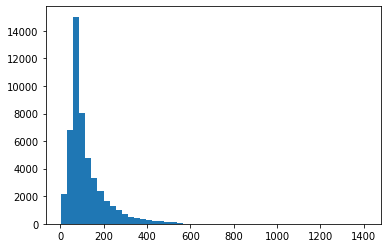

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(seq_lens, bins=50);

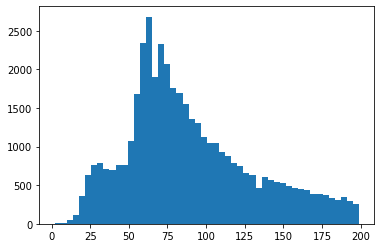

In [ ]:
plt.hist([l for l in seq_lens if l < 200], bins=50);

Stemming

In [ ]:
MAX_SEQUENCE_LENGTH = 215
# pad sequences with 0s
x = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x.shape)


Shape of data tensor: (49582, 215)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.80, shuffle=True, random_state=45)

In [ ]:
X_train.shape, X_test.shape

((39665, 215), (9917, 215))

In [ ]:
y_test.shape

(9917,)

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train = to_categorical(np.asarray(y_train))
y_test= to_categorical(np.asarray(y_test))
print('Shape of label tensor Y_test:', y_test.shape)
print('Shape of label tensor Y_train:', y_train.shape)

Shape of label tensor Y_test: (9917, 2)
Shape of label tensor Y_train: (39665, 2)


Long Short-Term Memory(LSTM)

In [ ]:
EMBEDDING_DIM = 450
N_CLASSES = 3

In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D 
from keras.models import Sequential

In [ ]:
## Creating model
model_lstm=Sequential()
model_lstm.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length = MAX_SEQUENCE_LENGTH))
model_lstm.add(SpatialDropout1D(0.5))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(2, activation='softmax'))

In [ ]:
model_lstm.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = 'accuracy')
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 450)          14222250  
                                                                 
 spatial_dropout1d (SpatialD  (None, 215, 450)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               296448    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 14,527,084
Trainable params: 14,527,084
Non-trainable params: 0
____________________________________________

In [ ]:
from tensorflow import keras

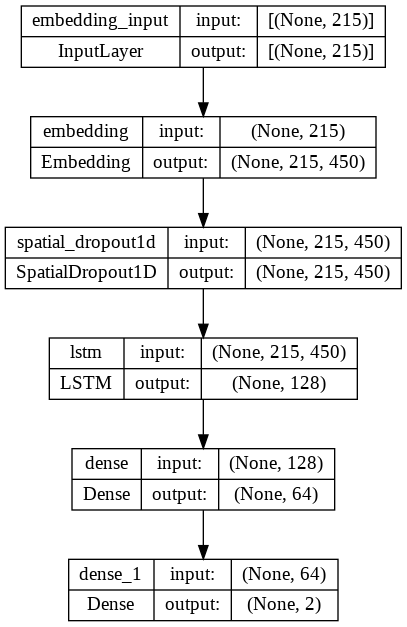

In [ ]:
keras.utils.plot_model(model_lstm,to_file='lstm.png',show_shapes=True)

In [ ]:
from keras.callbacks import EarlyStopping
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=3)

In [ ]:
lstm_model_fit = model_lstm.fit(X_train , y_train , validation_data= (X_test , y_test),batch_size = 32, 
          epochs = 40,verbose =2,callbacks=[earlyStop])

Epoch 1/40
1240/1240 - 41s - loss: 0.3413 - accuracy: 0.8544 - val_loss: 0.3009 - val_accuracy: 0.8820 - 41s/epoch - 33ms/step
Epoch 2/40
1240/1240 - 27s - loss: 0.1949 - accuracy: 0.9274 - val_loss: 0.2828 - val_accuracy: 0.8899 - 27s/epoch - 22ms/step
Epoch 3/40
1240/1240 - 28s - loss: 0.1299 - accuracy: 0.9527 - val_loss: 0.3271 - val_accuracy: 0.8879 - 28s/epoch - 23ms/step
Epoch 4/40
1240/1240 - 28s - loss: 0.0792 - accuracy: 0.9715 - val_loss: 0.3940 - val_accuracy: 0.8873 - 28s/epoch - 22ms/step
Epoch 5/40
1240/1240 - 27s - loss: 0.0580 - accuracy: 0.9809 - val_loss: 0.4348 - val_accuracy: 0.8848 - 27s/epoch - 22ms/step
Epoch 5: early stopping


In [ ]:
accuracy = model_lstm.evaluate(X_test, y_test)
print(accuracy)

310/310 [==============================] - 3s 11ms/step - loss: 0.4348 - accuracy: 0.8848
[0.43478256464004517, 0.884844183921814]


In [ ]:
print("Accuracy: %.2f%%" % (accuracy[1]*100))

Accuracy: 88.48%


In [ ]:
preds = np.round(model_lstm.predict((X_test)),0)
print("rounded test_labels",preds)

310/310 [==============================] - 3s 7ms/step
rounded test_labels [[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [ ]:
test_labels = np.array((y_test))

In [ ]:
from sklearn import metrics

In [ ]:
experiment_labels = ["0","1" ]
classification_metrics = metrics.classification_report(test_labels,preds,target_names=experiment_labels)
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4967
           1       0.88      0.89      0.89      4950

   micro avg       0.88      0.88      0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917
 samples avg       0.88      0.88      0.88      9917



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

310/310 [==============================] - 2s 7ms/step


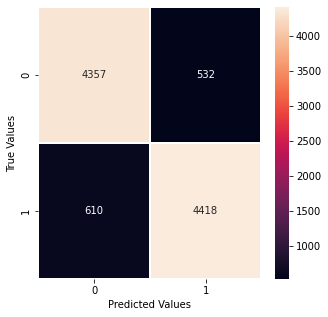

In [ ]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(5, 5))

pred = model_lstm.predict(X_test)

pred = np.argmax(pred, 1)
test = np.argmax(y_test, 1)

mat = confusion_matrix(test,pred)
sns.heatmap(mat.T, linewidths=1, annot=True, fmt='g')

plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();


In [ ]:
comment=['Product is very good, fit is good']
sequence = tokenizer.texts_to_sequences(comment)
test = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)
pred = model_lstm.predict(test)
labels = ['0','1']
print(labels[np.argmax(pred)])

1/1 [==============================] - 0s 37ms/step
0


In [ ]:
hist = pd.DataFrame(lstm_model_fit.history)

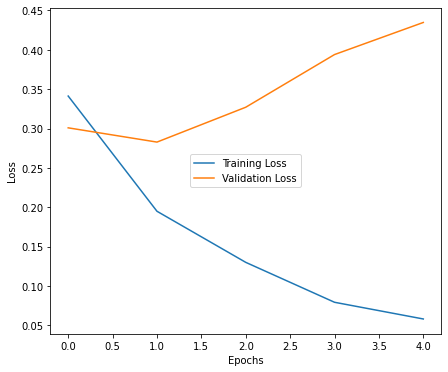

In [ ]:
plt.figure(figsize=(7,6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
hist['loss'].plot(label='Training Loss')
hist['val_loss'].plot(label='Validation Loss')
plt.legend(loc='center')

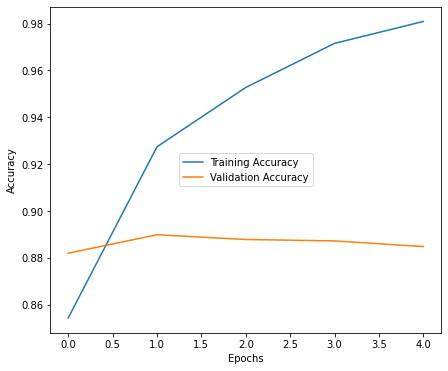

In [ ]:
plt.figure(figsize=(7,6))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
hist['accuracy'].plot(label='Training Accuracy')
hist['val_accuracy'].plot(label='Validation Accuracy')
plt.legend(loc='center')

 Convolutional Neural Network (CNN)

In [ ]:
from keras.layers import Dense , Dropout , Activation
from keras.layers import MaxPooling1D , GlobalMaxPooling1D,Conv1D , Flatten

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length = MAX_SEQUENCE_LENGTH))

model.add(Conv1D(64 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(5))

model.add(Conv1D(64 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(5))

model.add(Conv1D(64 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = 'accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 215, 450)          14222250  
                                                                 
 conv1d (Conv1D)             (None, 215, 64)           144064    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 43, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 43, 64)            20544     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 64)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 8, 64)            

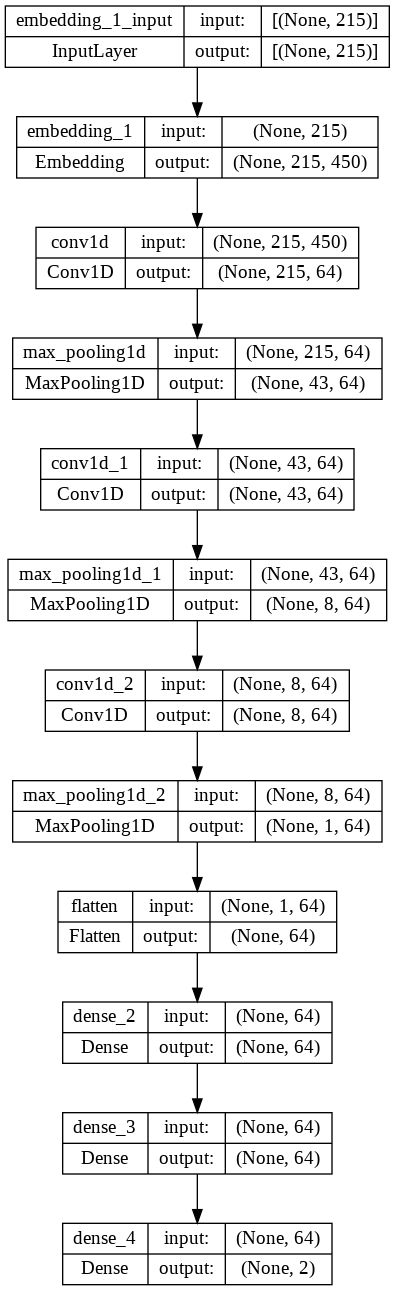

In [ ]:
keras.utils.plot_model(model,to_file='cnn.png',show_shapes=True)

In [ ]:
cnn_model=model.fit(X_train , y_train , validation_data= (X_test , y_test) ,batch_size = 32, 
          epochs = 40, verbose = 2,callbacks=[earlyStop])

Epoch 1/40
1240/1240 - 25s - loss: 0.4232 - accuracy: 0.7892 - val_loss: 0.3924 - val_accuracy: 0.8217 - 25s/epoch - 20ms/step
Epoch 2/40
1240/1240 - 17s - loss: 0.2309 - accuracy: 0.9024 - val_loss: 0.4274 - val_accuracy: 0.8254 - 17s/epoch - 14ms/step
Epoch 3/40
1240/1240 - 17s - loss: 0.1054 - accuracy: 0.9534 - val_loss: 0.5847 - val_accuracy: 0.8244 - 17s/epoch - 14ms/step
Epoch 4/40
1240/1240 - 17s - loss: 0.0638 - accuracy: 0.9689 - val_loss: 0.7232 - val_accuracy: 0.8176 - 17s/epoch - 14ms/step
Epoch 4: early stopping


In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
scores

[0.7232081294059753, 0.8175859451293945]

In [ ]:
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 81.76%


In [ ]:
from sklearn import metrics

In [ ]:
preds = np.round(model.predict((X_test)),0)
print("rounded test_labels",preds)

310/310 [==============================] - 1s 2ms/step
rounded test_labels [[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [ ]:
test_labels = np.array((y_test))

In [ ]:
experiment_labels = ["0","1"]
classification_metrics = metrics.classification_report(test_labels,preds,target_names=experiment_labels)
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      4967
           1       0.83      0.79      0.81      4950

   micro avg       0.82      0.82      0.82      9917
   macro avg       0.82      0.82      0.82      9917
weighted avg       0.82      0.82      0.82      9917
 samples avg       0.82      0.82      0.82      9917



310/310 [==============================] - 1s 2ms/step


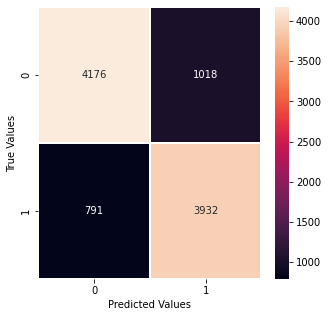

In [ ]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(5, 5))

pred = model.predict(X_test)

pred = np.argmax(pred, 1)
test = np.argmax(y_test, 1)

mat = confusion_matrix(test,pred)
sns.heatmap(mat.T, linewidths=1, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();


In [ ]:
comment=['this product is poor for me and I am not satisfied with this product',
         'Product is very good, fit is good']
sequence = tokenizer.texts_to_sequences(comment)
test = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(test)
labels = ['0','1',]

print(pred,labels[np.argmax(pred)])

1/1 [==============================] - 0s 58ms/step
[[0.4636349 0.5363651]
 [0.4636349 0.5363651]] 1


In [ ]:
hist = pd.DataFrame(cnn_model.history)

In [ ]:
y_pred = model.predict(X_test)

310/310 [==============================] - 1s 2ms/step


In [ ]:
ypred = [np.argmax(i) for i in y_pred]

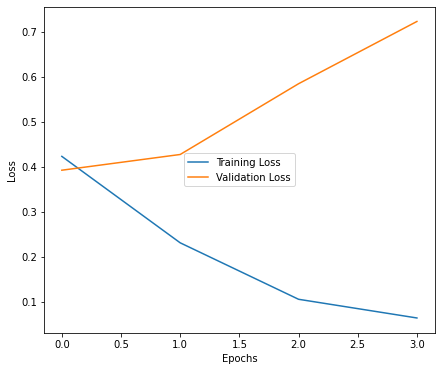

In [ ]:
plt.figure(figsize=(7,6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
hist['loss'].plot(label='Training Loss')
hist['val_loss'].plot(label='Validation Loss')
plt.legend(loc='center')

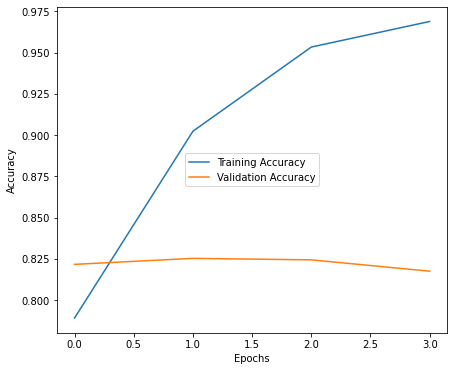

In [ ]:
plt.figure(figsize=(7,6))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
hist['accuracy'].plot(label='Training Accuracy')
hist['val_accuracy'].plot(label='Validation Accuracy')
plt.legend(loc='center')